In [1]:
import os
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

path_to_mvs_images = "../data/mvs_dataset/images"
path_to_mvs_models = "../data/mvs_dataset/point_clouds"


In [14]:
files_in_models_folder = os.listdir(path_to_mvs_models)
number_of_models = len(files_in_models_folder)

In [21]:
images_with_models_paths = []
number_of_images_for_model = []
images_folders = os.listdir(path_to_mvs_images)
for image_folder in images_folders:
    image_folder_path = path_to_mvs_images + os.path.sep + image_folder
    if os.path.isdir(image_folder_path):
        images_paths = os.listdir(image_folder_path)
        if len(images_paths) >0:
            number_of_images_for_model.append(len(images_paths))
            for image_path in images_paths:
                images_with_models_paths.append(image_folder_path + os.path.sep + image_path)

c:\users\filip\anaconda3\envs\kaolin\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


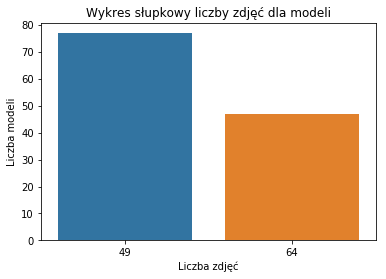

In [24]:
sns.countplot(number_of_images_for_model)
plt.title("Wykres słupkowy liczby zdjęć dla modeli")
plt.xlabel("Liczba zdjęć")
plt.ylabel("Liczba modeli")
plt.savefig("../reports/figures/mvs_number_of_images_for_models.png")

In [16]:
df = pd.DataFrame(data={"path": images_with_models_paths})

In [17]:
print(f"Number of models in the ShapeNet dataset: {number_of_models}")
print(f"Number of images for models in the ShapeNet dataset: {df['path'].count()}")


Number of models in the ShapeNet dataset: 124
Number of images for models in the ShapeNet dataset: 6781


In [25]:
get_file_format = lambda path: path.split(".")[-1]
df['file_format'] = df['path'].apply(get_file_format)

In [26]:
df['file_format'].unique()


array(['png'], dtype=object)

In [27]:
get_width_and_height = lambda path: Image.open(path).size
df['img_size'] = df['path'].apply(get_width_and_height)


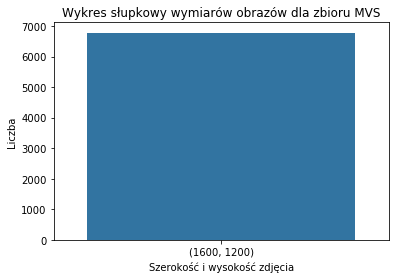

In [29]:
sns.countplot(data=df, x="img_size")
plt.title("Wykres słupkowy wymiarów obrazów dla zbioru MVS")
plt.xlabel("Szerokość i wysokość zdjęcia")
plt.ylabel("Liczba")
plt.savefig("../reports/figures/mvs_image_size.png")


In [37]:
summed_matrix = np.zeros(shape=(1200,1600,3))
for index, row in df.iterrows():
    img_matrix = np.asarray(Image.open(row['path']).convert('RGB'))
    summed_matrix = summed_matrix + img_matrix

avg_matrix = summed_matrix/len(df)
avg_matrix = avg_matrix.astype('uint8')

In [38]:
averaged_out_image = Image.fromarray(avg_matrix, "RGB")
averaged_out_image.save("../reports/figures/mvs_averaged_out_image.png")